<a href="https://colab.research.google.com/github/roronoazoro182/anime-studio-prediction/blob/main/studio_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classifying images according to the animation studios that produced them**

ANIME STUDIOS LIST:
1. MADHOUSE
2. KYOANI
3. JC STAFF
4. TOEI
5. STUDIO BONES
6. SUNRISE
7. STUDIO PIERROT
8. BRAIN'S BASE
9. PRODUCTION I.G
10. A1 PICTURES








In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense
from skimage.color import rgb2gray
from skimage.transform import resize,rescale
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')#,force_remount=True)

Mounted at /content/drive


***Train data***

In [ ]:
fig = plt.figure(figsize=(8,6))
plan_df = {}
studio = ['feel','toei','studio deen','madhouse']
count = 0
labels = []
for i in studio:
  for j in range(1,8):
    path = '/content/drive/My Drive/anime/train/'+i+'/p'+str(j)+'.png'
    img = plt.imread(path)  # reading image into variable named img
    img_bw = rgb2gray(img)  #converting the rgb image to grayscale
    plan_df[count] = img_bw  #storing the grayscale image in a dictionary
    print(img_bw.shape)
    labels.append(i) 
    count+=1

(486, 508)
(1080, 1920)
(811, 888)
(538, 649)
(308, 282)
(296, 247)
(269, 214)
(275, 404)
(66, 77)
(453, 527)
(280, 329)
(125, 165)
(126, 137)
(138, 172)
(242, 293)
(405, 412)
(221, 312)
(618, 728)
(380, 410)
(331, 500)
(527, 486)
(395, 342)
(204, 178)
(254, 201)
(322, 219)
(266, 229)
(390, 470)
(260, 214)


<Figure size 576x432 with 0 Axes>

In [ ]:
plan_df

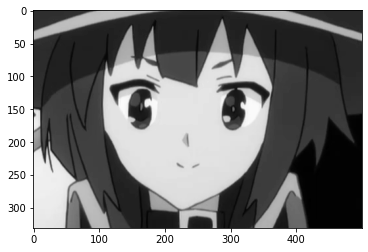

In [ ]:
plt.imshow(plan_df[19],cmap='gray')

In [ ]:
plan_df[1].shape

(1080, 1920)

In [ ]:
labels

['feel',
 'feel',
 'feel',
 'feel',
 'A1',
 'A1',
 'A1',
 'A1',
 'studio deen',
 'studio deen',
 'studio deen',
 'studio deen',
 'toei',
 'toei',
 'toei',
 'toei',
 'madhouse',
 'madhouse',
 'madhouse',
 'madhouse']

In [ ]:
x = []
y = []
for i in range(1,5):
  x.append(plan_df[i].shape[0])
  y.append(plan_df[i].shape[1])
   

In [ ]:
print(np.mean(x),np.mean(y))

1080.0 1920.0


In [ ]:
df = pd.DataFrame()
for i in range(16):
  size = resize(plan_df[i],(64,64)) # resizing all the images to 130x100 
  print(size.shape)
  size = size.flatten() # converting the image from 2d to 1d
  df[i] = size
  print(size.shape)

(64, 64)
(4096,)
(64, 64)
(4096,)
(64, 64)
(4096,)
(64, 64)
(4096,)
(64, 64)
(4096,)
(64, 64)
(4096,)
(64, 64)
(4096,)
(64, 64)
(4096,)
(64, 64)
(4096,)
(64, 64)
(4096,)
(64, 64)
(4096,)
(64, 64)
(4096,)
(64, 64)
(4096,)
(64, 64)
(4096,)
(64, 64)
(4096,)
(64, 64)
(4096,)


In [ ]:
df.shape

(4096, 16)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.589944,0.729403,0.770631,0.648892,0.482612,0.728257,0.845288,1.0,0.395473,0.668781,0.170797,0.950828,0.533960,0.0,0.975200,0.902051
1,0.591749,0.715019,0.770375,0.654153,0.480969,0.723970,0.844551,1.0,0.519017,0.670850,0.628667,0.925841,0.473806,0.0,0.939357,0.927639
2,0.592384,0.688791,0.753510,0.661979,0.483032,0.702417,0.843926,1.0,0.391071,0.671369,0.845965,0.984112,0.357084,0.0,0.747945,0.995060
3,0.591577,0.625229,0.685603,0.672239,0.609663,0.684112,0.843058,1.0,0.356299,0.671912,0.879953,0.925834,0.233031,0.0,0.806040,0.999734
4,0.591833,0.538230,0.670447,0.683321,0.631156,0.668374,0.842999,1.0,0.393013,0.668548,0.966092,0.951916,0.183556,0.0,0.807246,0.966600


In [ ]:
y_train = pd.DataFrame(labels)
print(y_train.shape)

(16, 1)


In [ ]:
y_train.head()

,0
0,feel
1,feel
2,feel
3,feel
4,A1


In [ ]:
y_train = pd.get_dummies(y_train)

In [ ]:
y_train.head()

,0_A1,0_feel,0_studio deen,0_toei
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0


In [ ]:
y.shape

(16, 4)

***Test data***

In [ ]:
fig = plt.figure(figsize=(8,6))
test_df = {}
studio = ['feel','A1','studio deen','toei','madhouse']
count = 0
labels_test = []
for i in studio:
  for j in range(1,3):
    path2 = '/content/drive/My Drive/anime/test/'+i+'/t'+str(j)+'.png'
    img = plt.imread(path2)  # reading image into variable named img
    img_bw = rgb2gray(img)  #converting the rgb image to grayscale
    test_df[count] = img_bw  #storing the grayscale image in a dictionary
    labels_test.append(i) 
    count+=1

<Figure size 576x432 with 0 Axes>

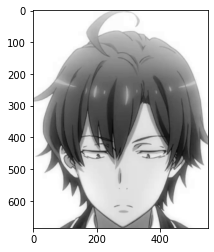

In [ ]:
plt.imshow(test_df[1],cmap='gray')

In [ ]:
test_df

In [ ]:
test = pd.DataFrame()

for i in range(8):
  size = resize(test_df[i],(64,64)) # resizing all the images to 130x100 
  print(size.shape)
  size = size.flatten() # converting the image from 2d to 1d
  test[i] = size
  print(size.shape)

(64, 64)
(4096,)
(64, 64)
(4096,)
(64, 64)
(4096,)
(64, 64)
(4096,)
(64, 64)
(4096,)
(64, 64)
(4096,)
(64, 64)
(4096,)
(64, 64)
(4096,)


In [ ]:
test.shape

(8, 4096)

In [ ]:
y_test = pd.DataFrame(labels_test)
y_test = pd.get_dummies(y_test)

In [ ]:
y_test

,0_A1,0_feel,0_studio deen,0_toei
0,0,1,0,0
1,0,1,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,1,0
5,0,0,1,0
6,0,0,0,1
7,0,0,0,1


***Image data generator***

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        width_shift_range=0.1, # horizontal shift
        height_shift_range=0.1, # vertical shift
        zoom_range=0.1, # zoom
        brightness_range=[0.2,1.2],
        shear_range=0.1,
        rotation_range=25,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(
        rescale=1./255,)

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(
        rescale=1./255,
        )

In [ ]:
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/anime/train/',  # this is the target directory
        target_size=(125,125),  # all images will be resized to 64x64
        batch_size=8,
        #color_mode='grayscale',
        class_mode='categorical',seed=8)#,save_to_dir='/content/drive/My Drive/anime/augmented')

Found 40 images belonging to 5 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/anime/test/',  # this is the target directory
        target_size=(125,125),  # all images will be resized to 64x64
        batch_size=1,
        #color_mode='grayscale',
        class_mode='categorical',seed=8)

Found 10 images belonging to 5 classes.


In [ ]:
i = 0
for batch in train_generator:
    i += 1
    if i > 40: # save 20 images
        break

***Calculating step size for train and test***

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size

In [ ]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

In [ ]:
print(STEP_SIZE_TRAIN,STEP_SIZE_TEST)

5 10


***creating model for imagedatagen***

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense,BatchNormalization


In [ ]:
early = EarlyStopping(monitor = 'accuracy',min_delta = 0,patience = 5, verbose = 1,restore_best_weights = True)
#check = ModelCheckpoint(filepath,monitor='loss',mode='min',save_best_only=True,verbose=1)

In [ ]:
model2 = Sequential()

model2.add(Conv2D(16, (3, 3),activation='relu', input_shape=(125,125,3)))
#model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(32, (3, 3),activation='relu',padding='same'))
#model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, (3, 3),activation='relu',padding='same'))
#model2.add(BatchNormalization())

#model2.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3),activation='relu', input_shape=(32,32,3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())


In [ ]:
model2.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model2.add((Dense(200,activation='relu')))
model2.add(Dropout(0.5))
model2.add((Dense(200,activation='relu')))
model2.add(Dropout(0.5)) # add padding
model2.add(Dense(5,activation='softmax'))

In [ ]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model2.fit(
        train_generator,
        steps_per_epoch=STEP_SIZE_TRAIN,
        epochs=40)#,callbacks=[early])
        #validation_data=validation_generator,
        #validation_steps=800 // batch_size)

Epoch 1/40
5/5 [==============================] - 0s 67ms/step - loss: 34.4327 - accuracy: 0.3000
Epoch 2/40
5/5 [==============================] - 0s 81ms/step - loss: 13.4076 - accuracy: 0.2750
Epoch 3/40
5/5 [==============================] - 0s 80ms/step - loss: 1.7744 - accuracy: 0.2250
Epoch 4/40
5/5 [==============================] - 0s 79ms/step - loss: 1.7590 - accuracy: 0.2250
Epoch 5/40
5/5 [==============================] - 0s 81ms/step - loss: 1.5451 - accuracy: 0.2750
Epoch 6/40
5/5 [==============================] - 0s 79ms/step - loss: 1.4710 - accuracy: 0.2000
Epoch 7/40
5/5 [==============================] - 0s 81ms/step - loss: 1.5229 - accuracy: 0.4000
Epoch 8/40
5/5 [==============================] - 0s 81ms/step - loss: 1.3628 - accuracy: 0.4500
Epoch 9/40
5/5 [==============================] - 0s 84ms/step - loss: 1.4705 - accuracy: 0.4250
Epoch 10/40
5/5 [==============================] - 0s 78ms/step - loss: 1.4029 - accuracy: 0.4500
Epoch 11/40
5/5 [==========

In [ ]:
model2.evaluate(test_generator,steps=STEP_SIZE_TEST)

10/10 [==============================] - 0s 13ms/step - loss: 1.7559 - accuracy: 0.5000


[1.755859375, 0.5]

**Converting prediction to studio labels**

In [ ]:
test_generator.class_indices

{'A1': 0, 'feel': 1, 'madhouse': 2, 'studio deen': 3, 'toei': 4}

In [ ]:
class_df = test_generator.class_indices

In [ ]:
pred = model2.predict(test_generator)

In [ ]:
pred

In [ ]:
plt.imshow(test_df[1],cmap='gray')

In [ ]:
def predict_studio(pred):
  pred_df = pd.DataFrame(pred)
  max = []
  pred_class = []
  for lab,row in pred_df.iterrows():
    max.append(row.idxmax())
    
  for i in max:
    for key,val in class_df.items():
      if i == val:
        pred_class.append(key)
  print(pred_class)

In [ ]:
predict_studio(pred)

['toei', 'studio deen', 'madhouse', 'feel', 'studio deen', 'A1', 'A1', 'feel', 'A1', 'toei']


**Predicting studio based on users input**

In [ ]:
import requests
from io import BytesIO

enter image path:
https://i.pinimg.com/564x/c9/58/8e/c9588e1c482c4ddcf43f97deaa4d8245.jpg


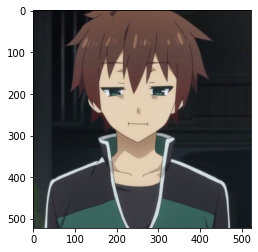

In [ ]:
url = input('enter image path:\n')
response = requests.get(url)
img = plt.imread(BytesIO(response2.content),0)
plt.imshow(img)

In [ ]:
img1 = resize(img,(1,64,64,3))

In [ ]:
img1.shape

(1, 64, 64, 3)

In [ ]:
pred_user = model2.predict(img1)

In [ ]:
pred_user

array([[0.07718007, 0.14746208, 0.13910663, 0.5504022 , 0.08584899]],
      dtype=float32)

In [ ]:
predict_studio(pred_user)

['studio deen']
